<a href="https://colab.research.google.com/github/QiyuLiu21/L04/blob/master/Data_Scientist_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
ds = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Scientist salary/data_cleaned_2021.csv")

In [6]:
ds.describe()

,index,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,469.129380,3.618868,1837.154987,0.032345,0.022911,74.754717,128.214286,101.484501,47.524259,0.528302,0.225067,0.237197,0.522911,0.512129,0.088949,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,279.793117,0.801210,497.183763,0.177034,0.149721,30.945892,45.128650,37.482449,53.839080,0.499535,0.417908,0.425651,0.499812,0.500190,0.284862,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,221.500000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,472.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,25.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,707.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,60.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,955.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
ds.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,11,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,23,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,na


In [8]:
len(ds)

742

In [9]:
len(ds['Company Name'].unique())

343

## The higher rating companies may not the ones offer high salary.


In [10]:
ds_rating = ds[['Company Name','Rating']]
ds_rating_agg= ds_rating.groupby('Company Name').mean().reset_index()
ds_rating_agg1=ds_rating_agg.sort_values('Rating', ascending=False)
ds_rating_agg2=ds_rating_agg1.head(10)
ds_rating_agg2

,Company Name,Rating
32,BPA Services\n5.0,5.0
142,Gridiron IT\n5.0,5.0
250,Royce Geospatial\n5.0,5.0
269,SkySync\n5.0,5.0
10,Acuity Insurance\n4.8,4.8
164,KnowBe4\n4.8,4.8
293,TechProjects\n4.8,4.8
145,HOVER\n4.8,4.8
210,Object Partners\n4.7,4.7
203,New England Biolabs\n4.7,4.7


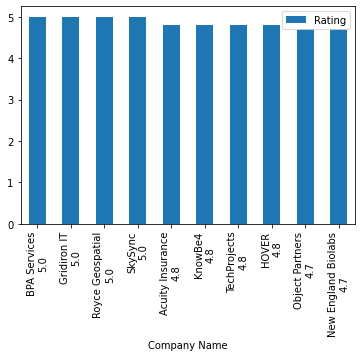

In [11]:
ds_rating_agg2.plot(x='Company Name',y='Rating',kind = 'bar')

In [140]:
ds_average_salary = ds[['Company Name','Avg Salary(K)']]
ds_average_salary_agg= ds_average_salary.groupby('Company Name').mean().reset_index()
ds_average_salary_agg1=ds_average_salary.sort_values('Avg Salary(K)', ascending=False)
ds_average_salary_agg2=ds_average_salary_agg1.head(10)
ds_average_salary_agg2

,Company Name,Avg Salary(K)
708,Liberty Mutual Insurance\n3.3,254.0
528,Liberty Mutual Insurance\n3.3,254.0
354,Liberty Mutual Insurance\n3.3,254.0
103,Gallup\n4.2,237.5
429,Sage Intacct\n4.7,232.5
176,CA-One Tech Cloud,225.0
266,CA-One Tech Cloud,225.0
613,Grand Rounds\n4.2,221.5
330,Credit Sesame\n4.1,205.0
195,Credit Sesame\n4.1,205.0


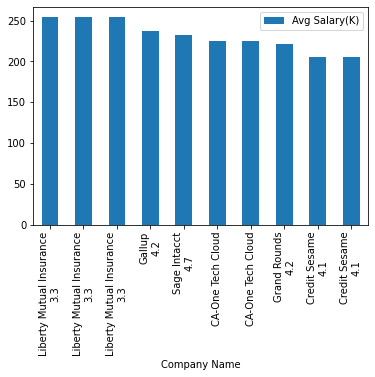

In [141]:
ds_average_salary_agg2.plot(x='Company Name',y='Avg Salary(K)',kind = 'bar')

## Master degree is not necessary to become a Data Scientist.

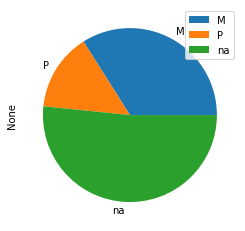

In [12]:
ds.groupby('Degree').size().plot(kind='pie', legend=True)

## The salary dispersion range and the average salary of data scientist in the United States.

In [13]:
ds_average_salary = ds[['Company Name','Avg Salary(K)']]
ds_average_salary_agg= ds_average_salary.groupby('Company Name').mean().reset_index()
ds_average_salary_agg

,Company Name,Avg Salary(K)
0,"1-800-FLOWERS.COM, Inc.\n2.8",76.50
1,1904labs\n4.7,143.50
2,23andMe\n4.0,92.00
3,7Park Data\n3.8,121.00
4,<intent>\n4.6,140.00
...,...,...
338,e-IT Professionals Corp.\n3.5,139.50
339,goTRG\n4.2,85.50
340,h2o.ai\n4.3,148.75
341,iSeatz\n3.5,48.00


99.41478203526312

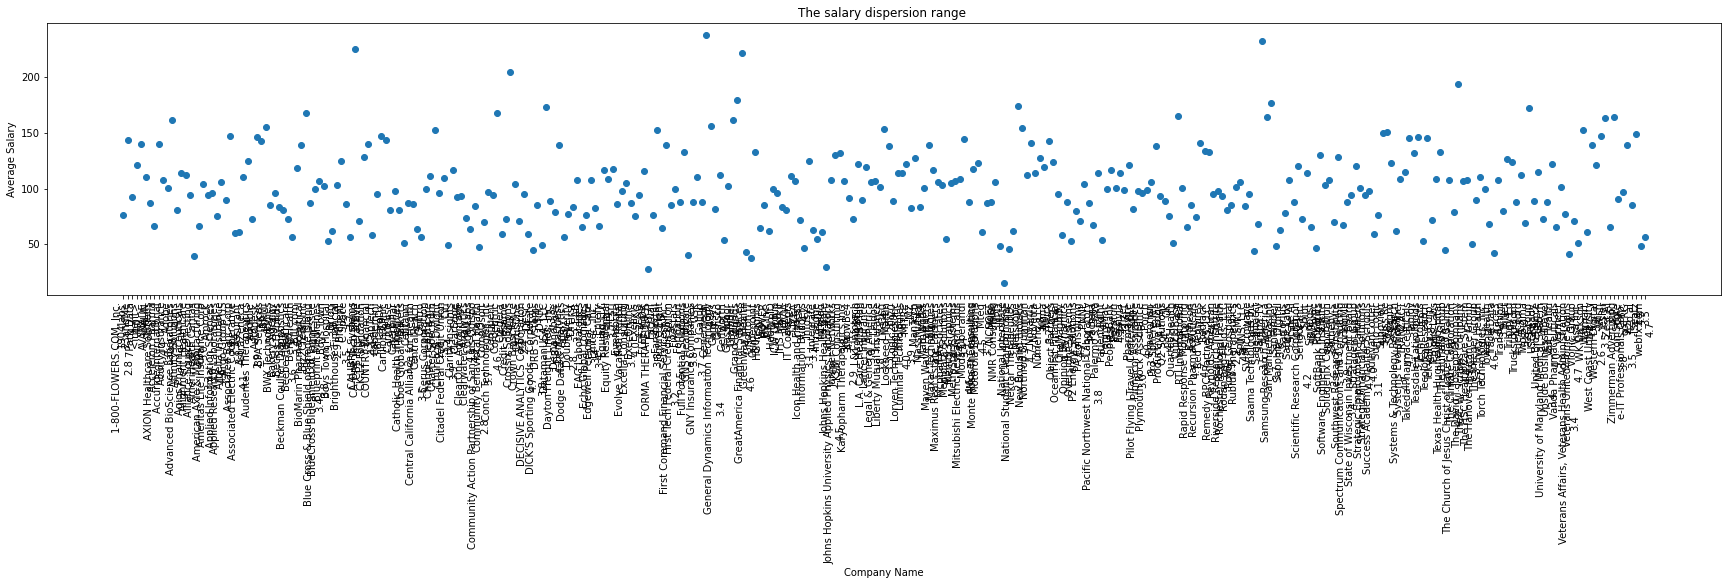

In [87]:
plt.scatter(x=ds_average_salary_agg['Company Name'],y=ds_average_salary_agg['Avg Salary(K)'])
plt.title('The salary dispersion range ')
plt.xlabel('Company Name')
plt.ylabel('Average Salary')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(30, 5)
ds_average_salary_agg['Avg Salary(K)'].mean()

## The average salary of different ownership.


In [37]:
ds_ownership_salary = ds[['Type of ownership','Avg Salary(K)']]
ds_ownership_salary_agg= ds_ownership_salary.groupby('Type of ownership').mean().reset_index()
ds_ownership_salary_agg

,Type of ownership,Avg Salary(K)
0,College / University,107.615385
1,Company - Private,102.081707
2,Company - Public,111.038860
3,Government,85.733333
4,Hospital,66.833333
5,Nonprofit Organization,73.190909
6,Other Organization,77.900000
7,School / School District,77.750000
8,Subsidiary or Business Segment,110.573529


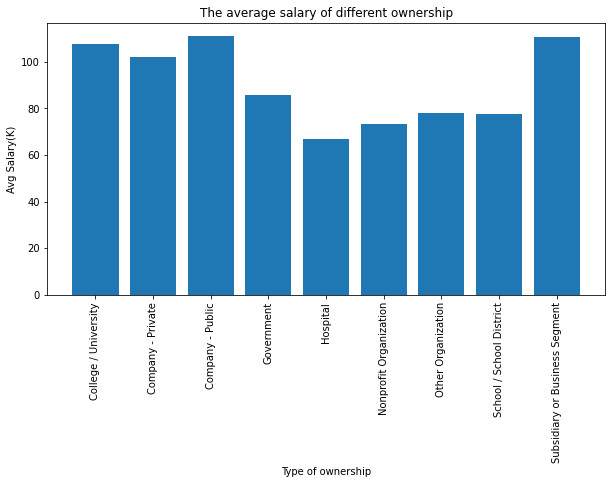

In [70]:
plt.bar(x =ds_ownership_salary_agg['Type of ownership'],height =ds_ownership_salary_agg['Avg Salary(K)'])
plt.xticks(rotation = 90)
plt.title('The average salary of different ownership')
plt.xlabel('Type of ownership')
plt.ylabel('Avg Salary(K)')
fig = plt.gcf()
fig.set_size_inches(10, 5)


Text(0.5, 1.0, 'The salary range of different ownership')

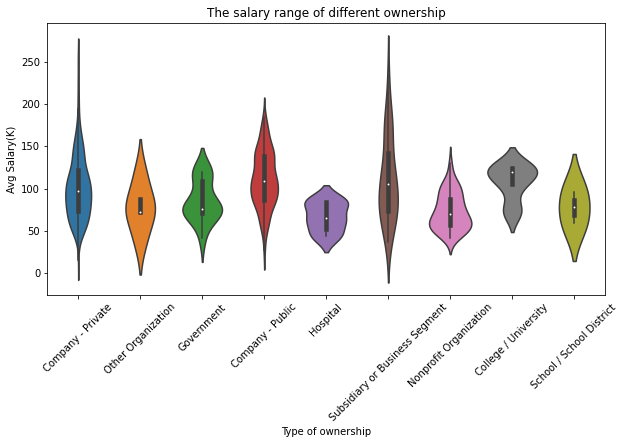

In [84]:
dsviolin=sns.violinplot(data=ds, x='Type of ownership', y='Avg Salary(K)')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.xticks(rotation = 45)
dsviolin.set_title('The salary range of different ownership')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 45.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'The salary range of different ownership')

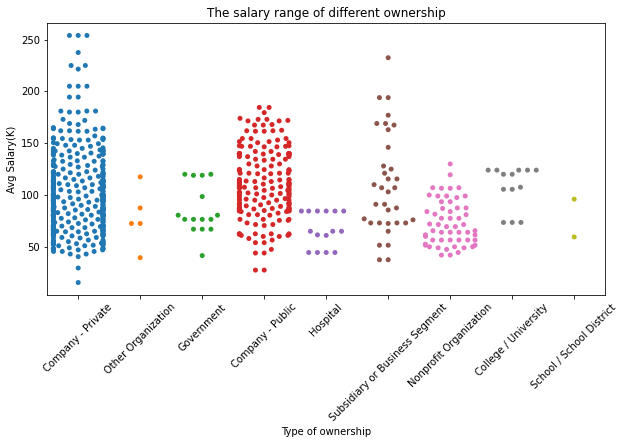

In [89]:
dsswarm=sns.swarmplot(data=ds, x='Type of ownership', y='Avg Salary(K)')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.xticks(rotation = 45)
dsswarm.set_title('The salary range of different ownership')

Text(0.5, 1.0, 'The salary range of different ownership')

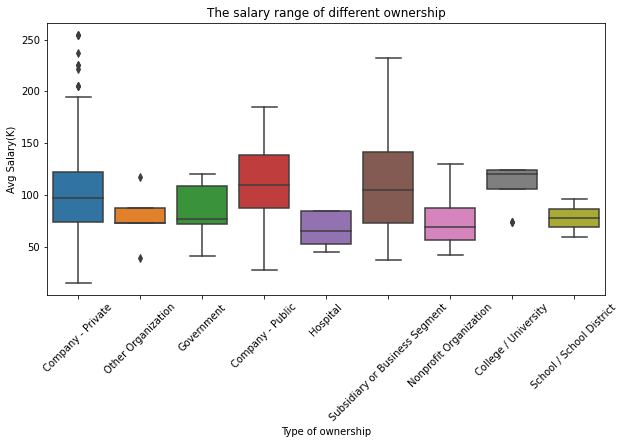

In [90]:
dsbox=sns.boxplot(data=ds, x='Type of ownership', y='Avg Salary(K)')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.xticks(rotation = 45)
dsbox.set_title('The salary range of different ownership')

Text(0.5, 1.0, 'The salary range of different ownership')

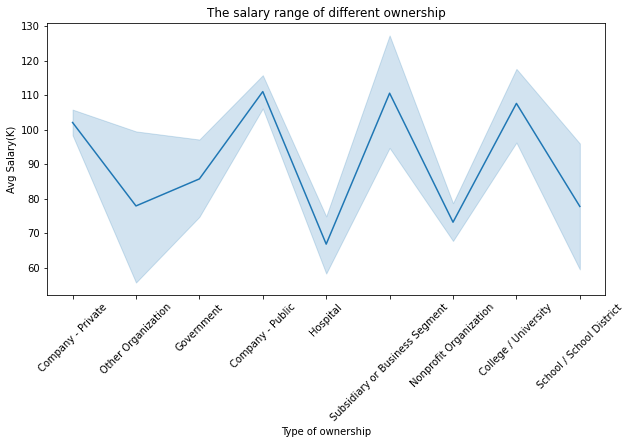

In [101]:
dsline=sns.lineplot(data=ds, x='Type of ownership', y='Avg Salary(K)')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.xticks(rotation = 45)
dsline.set_title('The salary range of different ownership')

## The company density of size and revenue.

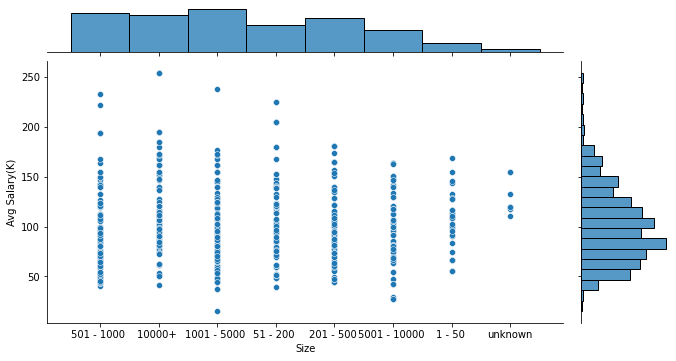

In [142]:
dsjoint=sns.jointplot(data=ds, x= 'Size', y = 'Avg Salary(K)', kind = 'scatter')
fig = plt.gcf()
fig.set_size_inches(10, 5)

In [135]:
ds_pair = ds[['Age','Avg Salary(K)','Rating']]
ds_pair

,Age,Avg Salary(K),Rating
0,48,72.0,3.8
1,37,87.5,3.4
2,11,85.0,4.8
3,56,76.5,3.8
4,23,114.5,2.9
...,...,...,...
737,191,84.5,3.9
738,15,102.5,4.4
739,37,73.5,2.6
740,-1,127.5,3.2


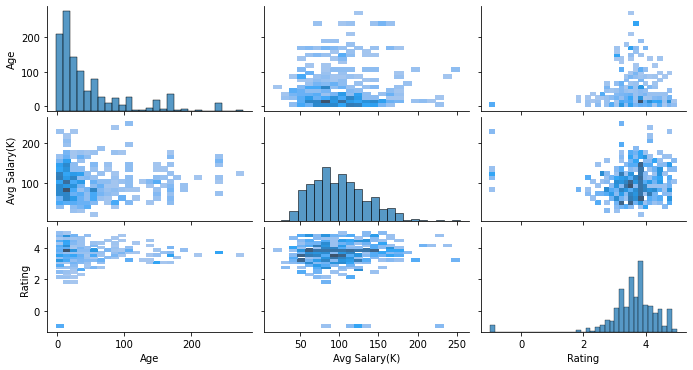

In [137]:
dspair=sns.pairplot(data=ds_pair, kind = 'hist')
fig = plt.gcf()
fig.set_size_inches(10, 5)